# Part 2
In this part of the project, you will have an opportunity to explore some of the limitations and extensions of the K-means algorithm. Sometimes the results of the K-means algorithm don't exactly match the output we'd want. We explore a few methods to allow the K-means algorithm to accommodate these cases. In the final part of this project, you'll refer to a research paper and explore a variant of the K-means algorithm - Kernelized K-means. This gives you a chance to see how the Kernel trick can be applied in the context of K-means as well!

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import matplotlib 
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn import datasets
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt

In [2]:
def gaussian_sample(mean, sigma, size):
    return np.random.normal(mean, sigma, size)

### Example 1: K-means optimizes for intra-cluster distance
Running the code block below, you will see that in spite of choosing k=3, the algorithm will often assign 2 centroids to what is actually a single cluster. (If this isn't the case, try re-running the code a few times.) **Consider the differences in the distributions of data below and explain why this phenomenon might be occurring.**

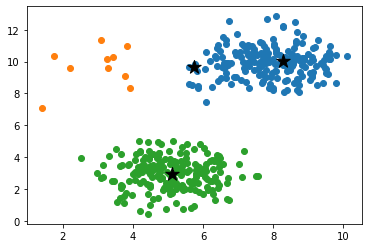

In [3]:
class_1 = gaussian_sample([8, 10], [1, 1], [200, 2])
class_2 = gaussian_sample([3, 10], [1, 1], [10, 2])
class_3 = gaussian_sample([5, 3], [1, 1], [200, 2])
X = np.vstack([class_1, class_2, class_3])
kmeans = KMeans(n_clusters = 3, init = 'random', n_init = 1).fit(X)

plt.scatter(*class_1.T)
plt.scatter(*class_2.T)
plt.scatter(*class_3.T)
plt.scatter(*kmeans.cluster_centers_.T, s = 200, marker = '*', c = 'black')

#### Start example-1 answer ####

#### End example-1 answer ####

### Example 2: Random Restarts with K-Means
To address the issue in Example 1, we can improve the algorithm's performance by running K-means multiple times with different random initializations. The final chosen clusters will be the one that achieves the smallest cost for the objective function - minimizing the squared sum distances of the data points to the cluster centroids. 

(This isn't a perfect solution, sometimes the result of random restarts will still produce a clustering that assigns 2 centroids to a single cluster. But, it does improve the clustering in some examples.)

This is easily implemented using the the sklearn KMeans function with the n_init parameter, which defines the number of random restarts that the algorithm will perform. **Set the value for the n_init parameter in the KMeans function below.** 

NameError: name 'set_value_here' is not defined

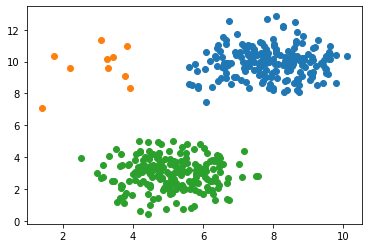

In [4]:
plt.scatter(*class_1.T)
plt.scatter(*class_2.T)
plt.scatter(*class_3.T)
## TODO: SET THE N_INIT PARAMETER BELOW ##
kmeans = KMeans(n_clusters = 3, init = 'random', n_init = set_value_here).fit(X)
## END TODO ##
plt.scatter(*kmeans.cluster_centers_.T, s = 200, marker = '*', c = 'black')

### Example 3: Feature lifting with K-means
Below, we will see how K-means performs on circularly separable data. Running K-means on the original data of 2 concentric circles results in the clustering below. In these demos, each of the colors represent how the algorithm separated the data, where the stars denote the centroids of the clusters. 

Running ordinary K-means on the original dataset of (x,y) coordinates results in the clustering below. **Comment on the performance below.**

In [ ]:
X, Y = datasets.make_circles(noise = 0.05, factor = 0.25)
kmeans = KMeans(n_clusters = 2, init = 'random').fit(X)
predictions = kmeans.predict(X)
colors = ['red', 'blue']
plt.scatter(*X.T, c = predictions, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(*kmeans.cluster_centers_.T, s = 200, marker = '*', c = 'black')

#### Start Example-3,1 Answer ####

#### End Example-3,1 Answer ####

#### Ordinary Polynomial Feature Augmentation 
As we've seen with regression techniques, we can try lifting the feature space. In this case, a natural thought might be to lift the feature space using the radius-squared feature (summing the squares of the coordinates). **Update the X_aug variable to contain the original data with another feature representing the radius-squared of each data point.**
**Then, comment on the performance of this strategy below and why this might result.**

In [ ]:
X_aug = ##TODO: Augment with radius-squared feature ##
kmeans_lifted = KMeans(n_clusters = 2).fit(X_aug)
predictions = kmeans_lifted.predict(X_aug)
colors = ['red', 'blue']
plt.scatter(*X.T, c = predictions, cmap=matplotlib.colors.ListedColormap(colors))

#### Start Example-3,2 Answer ####

#### End Example-3,2 Answer ####

#### Manually selecting an appropriate feature
Looking at the feature set above, the radius-squared feature is what would actually help us differentiate between the clusters. Let us try running K-means again using only the radius-squared feature. **Now, set the X_aug variable to contain a single feature, the radius-squared of each data point. Then, comment on the performance of this strategy below and why this might result.**

In [5]:
X_aug = ##TODO: Manually select the radius-squared feature ##
kmeans_lifted = KMeans(n_clusters = 2).fit(X_aug.reshape(-1,1))
predictions = kmeans_lifted.predict(X_aug.reshape(-1,1))
colors = ['red', 'blue']
plt.scatter(*X.T, c = predictions, cmap=matplotlib.colors.ListedColormap(colors))

SyntaxError: invalid syntax (<ipython-input-5-af61a6b5ee43>, line 1)

#### Start Example-3,3 Answer ####

#### End Example-3,3 Answer ####

#### Using Kernel PCA to lift & reduce the dimensionality
We cannot always manually construct and select the feature that will help separate the data. In this case, we will use KernelPCA with the RBF Kernel. This allows us to perform non-linear dimensionality reduction. We can then run KMeans in this reduced space to cluster the data.

**Try out the RBF, Polynomial, and Sigmoid Kernels in the KernelPCA method below. Select a Kernel that defines 2 separate clusters to then run K-means.**

The first graph shows the projection of data points into 2-D PCA space. The second graph visualizes how the original data points were clustered using the PCA + K-means strategy. **Comment on the results of this strategy.**

In [6]:
## TODO: Choose a Kernel that appropriately defines 2 clusters ##
kpca = KernelPCA(n_components = 2, kernel = select_kernel)
## END TODO ##

projected_data = kpca.fit_transform(X)
plt.scatter(*projected_data.T, c = Y, cmap=matplotlib.colors.ListedColormap(colors))

print("Points projected into PCA Space")
kmeans_pca = KMeans(n_clusters = 2).fit(projected_data)
predictions = kmeans_pca.predict(projected_data)
plt.scatter(*kmeans_pca.cluster_centers_.T, s = 200, marker = '*', c = 'black')
plt.show()

print("Output of Clustering Algorithm in Original Space")
plt.scatter(*X.T, c = predictions, cmap=matplotlib.colors.ListedColormap(colors))

NameError: name 'select_kernel' is not defined

#### Start Example-3,3 Answer ####

#### End Example-3,3 Answer ####

## Variations of k-Means: Kernelized k-Means

Recall how kernels are a more efficient way for model calculations through the computation of inner products. Please read through Section 2.1 in the paper below to understand how kernelized k-Means works, particularly focusing on the update step. Below is a **FLAWED implementation of kernelized k-Means.** Please locate the bugs and correct them so that the function works as intended.

Link to paper: https://www.cs.utexas.edu/users/inderjit/public_papers/kdd_spectral_kernelkmeans.pdf

In [ ]:
def k_means_kernelized(data, k, max_iter = 1000, weights = None, kernel_type = "linear"):
    n = len(data)
    # Randomize initial clusters
    random_state = check_random_state(None)
    labels = np.random.randint(k, size = n)

    # Initialize kernel
    kernel = pairwise_kernels(data, None, kernel_type)

    # Set weights if not defined to be all 1s (no preference)
    if not weights:
        weights = np.ones(n)

    # Inter/Intra Cluster distance storage
    intra_dist = np.zeros((n, k))
    inter_dist = np.zeros(k)

    for i in range(max_iter):
        intra_dist.fill(0)
        for cluster in range(k):
            # This is our mask to isolate the points currently in cluster j
            cluster_points = labels == cluster

            # If k is too large, we may have empty clusters!
            if np.sum(cluster_points) == 0:
                return "Empty cluster!"

            size = np.count_nonzero(cluster_points)
            cluster_kernel = kernel[cluster_points][:, cluster_points]

            # This is our distance update step using the kernel trick!
            this_cluster_dist = np.sum(np.outer(weights[cluster_points], weights[cluster_points]) * cluster_kernel / size ** 2)
            inter_dist[cluster] = this_cluster_dist ** 2

            # Update step
            intra_dist[:, cluster] += this_cluster_dist 
            intra_dist[:, cluster] += np.sum(weights[cluster_points] * kernel[:, cluster_points], axis = 1) / size ** 2

    # If none of the labels were updated, we are done.  
        previous_labels = labels[:]
        labels = intra_dist.argmin(axis = 1)
        if np.sum((labels - previous_labels) == 0) == 0:
            break

    return np.array(labels)

In [ ]:
# Code to test the function. Random 2D data is generated in this simple case.
data = 100 * np.random.rand(100, 2)
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4: "orange", 5: 'purple', 6: 'black', 7: 'pink'}
plt.scatter(data[:, 0], data[:, 1])

In [ ]:
# If the function is correctly fixed, you should see distinct clusters.
labels = k_means_kernelized(data, 5, 1000)
color_labels = np.vectorize(colors.get)(labels)
color_labels
plt.scatter(data[:, 0], data[:, 1], c = color_labels)


Question: Try the kernelized clustering with different parameters. What happens when:
        
<ul>    
<li>The number of clusters is reduced from 5 to 3?</li>
<li>An RBF kernel is used instead of a linear one?</li>
<li>max_iter is reduced to 100 or increased to 10000?</li>
    
</ul>

#### Start Answer ####

#### End Answer ####